# Solution Graded Exercise 8: Hopfield Network model of associative memory

first name: David

last name: Cleres

sciper: 247182

date: 23.04.2018

*Your teammate*

first name of your teammate: Nicolas

last name of your teammate: Lesimple

sciper of your teammate: 237699


Note: You are allowed to discuss the concepts with your class mates. You are not allowed to share code. You have to understand every line of code you write in this notebook. We will ask you questions about your submission during a fraud detection session during the last week of the semester.

** Remember **

If you are asked for plots: The appearance of the plots (labelled axes, ** useful scaling **, etc.) is important!

If you are asked for discussions: Answer in a precise way and try to be concise. 


** Submission **

Rename this notebook to Ex8_FirstName_LastName_Sciper.ipynb and upload that single file on moodle before the deadline.

** Link to the exercise **

http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/hopfield-network.html

## \* \* \* \* Programming Notes : Copying and slicing lists and numpy arrays \* \* \* \*
We would like to take the opportunity to bring to your attention certain features of Python, that might lead to unwanted behaviour and serious mistakes, if one is not aware of them. 
Please check the Python Cheat Sheet file on the moodle (https://moodle.epfl.ch/mod/page/view.php?id=981134 Part 4 of the ipynb file) for some examples of the following notes:

* Assigning a list to a new variable does not create a copy of the list, but creates a variable that points to the list. This means that modifying the second variable, also modifies the original list.
* Assigning a slice of a list to a new variable, creates a copy of the list. Any modification to the sliced list does not modify the original.

Now when it comes to numpy arrays:
* Assigning a numpy array to a new variable does not create a copy of the array, but creates a variable that points to the array. This means that modifying the second variable, also modifies the original array. (same as above)
* Assigning a slice of a numpy array to a new variable creates a variable that points to the corresponding elements of the original array as well! (contrary to what we saw above!) This means that modifying the second variable, also modifies the original array!
* To copy the original array and ensure that it is not modified by any modification of its copied version, the method copy() should be used.

# Exercise 8.1. Getting started

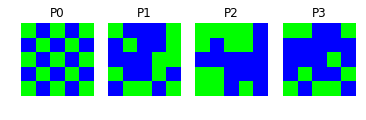

C:\Users\nicol\Miniconda2\envs\biomodel\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


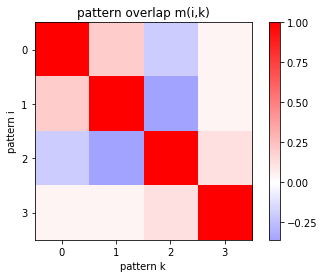

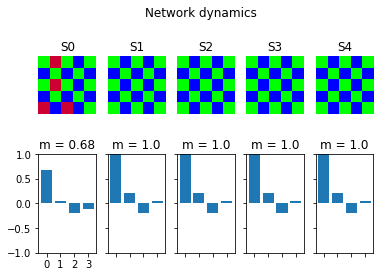

In [1]:
%matplotlib inline
from neurodynex.hopfield_network import network, pattern_tools, plot_tools

pattern_size = 5

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=4)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")


# 8.3. Exercise: N=4x4 Hopfield-network
## 8.3.1. Question: Storing a single pattern
#### [2 + 2 + 3 points]

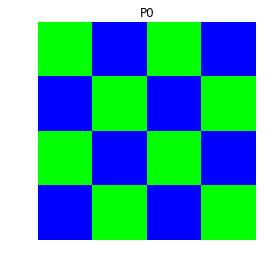

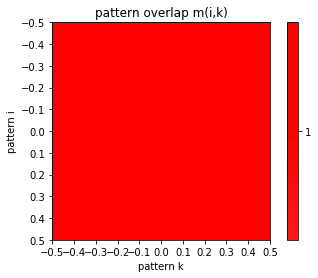

In [2]:
#Create a network with N=16 neurons.
pattern_size = 4

# create an instance of the class HopfieldNetwork / Create a single 4 by 4 checkerboard pattern.
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
checkerboard = factory.create_checkerboard()

# create a checkerboard pattern and add it to the pattern list / Store the checkerboard in the network.
pattern_list = [checkerboard]
plot_tools.plot_pattern_list(pattern_list)

# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=5)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

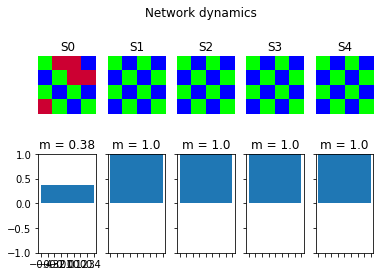

In [3]:
# Plot the sequence of network states along with the overlap of network state with the checkerboard
# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

Now test whether the network can still retrieve the pattern if we increase the number of flipped pixels. What happens at nr_flipped_pixels = 8, what if nr_flipped_pixels > 8 ?

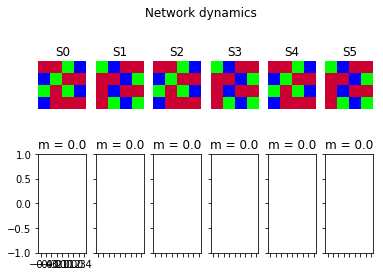

In [4]:
### FOR 8 FLIPS IN THE NETWORK ###
# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=8)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=5)

# Plot the sequence of network states along with the overlap of network state with the checkerboard
# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

If we set the amount of flipped pixkels to 8 then we always end with a random pattern of pixels as a final state and the pattern is not retrieved

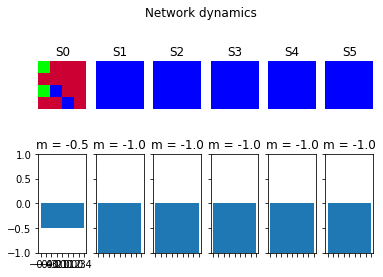

In [5]:
### FOR MORE THAN 8 FLIPS IN THE NETWORK ###
# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=12)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=5)

# Plot the sequence of network states along with the overlap of network state with the checkerboard
# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

If we set the amount of flipped pixkels to more than 8 then we never end with the pattern to retrieve. In a large majority of cases all the pixels end in the same state which is (blue (-1)) and in very rare cases we end up with a random pattern of pixels

## 8.3.2. Question: the weights matrix
#### [1 + 3 + 2 points]

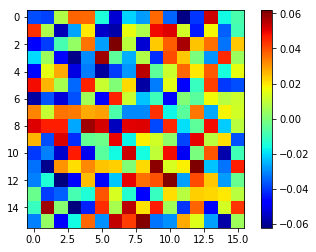

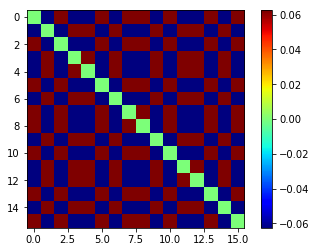

In [6]:
#1. Create a network 4x4.
pattern_size = 4
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)

#2. What is the size of the network matrix? 16 Neurons ??????????????????? Mais pourquoi la matrice est de taille 16x16 ???? 

#3. Visualize the weight matrix using the function plot_tools.plot_nework_weights(). It takes the network as a parameter.
plot_tools.plot_nework_weights(hopfield_net)

#4. Create a checkerboard, store it in the network.
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]
hopfield_net.store_patterns(pattern_list)
#5. Plot the weights matrix. What weight values do occur?
plot_tools.plot_nework_weights(hopfield_net)

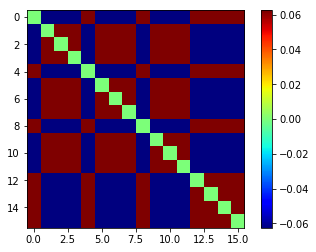

In [7]:
#6. Create a new 4x4 network
pattern_size = 4
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)

#7. Create an L-shaped pattern (look at the pattern factory doc), store it in the network
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
L_shape = factory.create_L_pattern()
pattern_list = [L_shape]
hopfield_net.store_patterns(pattern_list)
#8. Plot the weights matrix. What weight values do occur?
plot_tools.plot_nework_weights(hopfield_net)

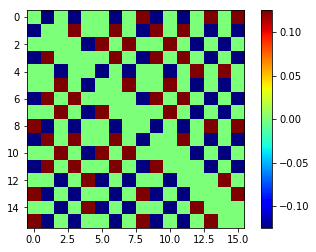

In [8]:
#9. Create a new 4x4 network
pattern_size = 4
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)

#10. Create a checkerboard and an L-shaped pattern. Store both patterns in the network
L_shape = factory.create_L_pattern()
checkerboard = factory.create_checkerboard()

pattern_list = [L_shape, checkerboard]
hopfield_net.store_patterns(pattern_list)
#11. Plot the weights matrix. What weight values do occur?How does this matrix compare to the two previous matrices?
plot_tools.plot_nework_weights(hopfield_net)

How does this matrix compare to the two previous matrices?

Whereas the two first matrices looked the same. The third matrix is quite different from the first two. However the symmetric seems to have been kept as well as the central line of symetry. 

## 8.3.3. Question (optional): Weights Distribution

(array([ 64.,   0.,   0.,   0.,   0., 142.,   0.,   0.,   0.,  50.]),
 array([-0.125, -0.1  , -0.075, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,
         0.075,  0.1  ,  0.125]),
 <a list of 10 Patch objects>)

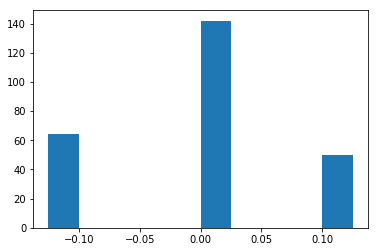

In [9]:
# You can easily plot a histogram by adding the following two lines to your script. 
#It assumes you have stored your network in the variable ‘hopfield_net’.

import matplotlib.pyplot as plt

plt.figure()
plt.hist(hopfield_net.weights.flatten())

# 8.4. Exercise: Capacity of an N=100 Hopfield-network
## 8.4.1. Associative memory.
#### [2 points]

A Hopfield network implements so called associative or content-adressable memory. Explain what this means. (max 4 lines)

The hopfield model is based on matching patterns. These patterns are known in advance this means that, in the case of the computer, we can give then as an input. In the case of the brain this means that one has already encountered and learned a given pattern (tate, form and color of a banana) so that we can match a something we see with the learnt and memorized pattern.  

## 8.4.2. Capacity of the network.
#### [1 points]

Using the value $C_{store}$
 given in the book, how many patterns can you store in a N=10x10 network? Use this number K in the next question:


The value of Cstore in the book is Mmax / N = Cstore with Cstore = 0.138 
Mmax = N * Cstore = 10x10x0.138 = 13.8 patterns ~14 patterns 

## 8.4.3. Checkerboard and random patterns.
#### [3 points]

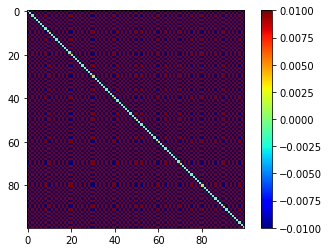

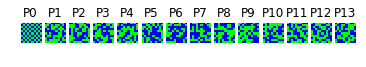

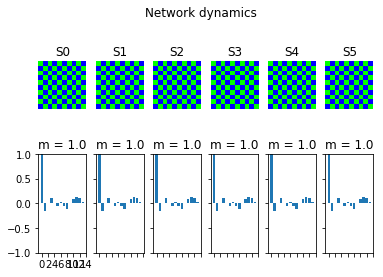

In [10]:
pattern_size = 10
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
Cstore = 0.138
K = int(Cstore*10*10)

factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

hopfield_net.store_patterns(pattern_list)
#11. Plot the weights matrix. What weight values do occur?How does this matrix compare to the two previous matrices?
plot_tools.plot_nework_weights(hopfield_net)

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=K, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

#initializes the network with the unchanged checkboard pattern
hopfield_net.set_state_from_pattern(pattern_list[0])

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=5)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

Rerun your script a few times. What do you observe? 
#### [2 points]
If we initialize the model at the unchanged value then we already have the pattern so nothing happens. 

# 8.5. Exercise: Non-random patterns
## 8.5.1. Alphabet.

the alphabet is stored in an object of type: <type 'dict'>
letters are patterns of size: (10, 10). Create a network of corresponding size


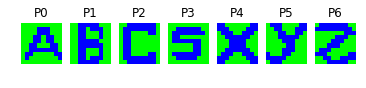

ValueError: shape mismatch: value array of shape (100,) could not be broadcast to indexing result of shape (20,)

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from neurodynex.hopfield_network import network, pattern_tools, plot_tools
import numpy

# the letters we want to store in the hopfield network
letter_list = ['A', 'B', 'C', 'S', 'X', 'Y', 'Z']

# set a seed to reproduce the same noise in the next run
# numpy.random.seed(123)

abc_dictionary =pattern_tools.load_alphabet()
print("the alphabet is stored in an object of type: {}".format(type(abc_dictionary)))
# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])

# create a list using Pythons List Comprehension syntax:
pattern_list = [abc_dictionary[key] for key in letter_list ]
plot_tools.plot_pattern_list(pattern_list)

# store the patterns
hopfield_net.store_patterns(pattern_list)

# # create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.get_noisy_copy(abc_dictionary['A'], noise_level=0.2)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

## 8.5.2. Add a letter.
#### [2 points]

the alphabet is stored in an object of type: <type 'dict'>
letters are patterns of size: (10, 10). Create a network of corresponding size


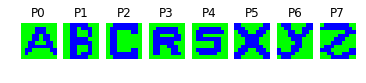

ValueError: shape mismatch: value array of shape (100,) could not be broadcast to indexing result of shape (20,)

In [12]:
# the letters we want to store in the hopfield network
letter_list = ['A', 'B', 'C','R', 'S', 'X', 'Y', 'Z']

# set a seed to reproduce the same noise in the next run
# numpy.random.seed(123)

abc_dictionary =pattern_tools.load_alphabet()
print("the alphabet is stored in an object of type: {}".format(type(abc_dictionary)))
# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])

# create a list using Pythons List Comprehension syntax:
pattern_list = [abc_dictionary[key] for key in letter_list ]
plot_tools.plot_pattern_list(pattern_list)

# store the patterns
hopfield_net.store_patterns(pattern_list)

# # create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.get_noisy_copy(abc_dictionary['A'], noise_level=0.2)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

Is the pattern ‘A’ still a fixed point? 
Does the overlap between the network state and the reference pattern ‘A’ always decrease? (max 3 lines)
#### [3 points]

## 8.5.3. Capacity.
#### [3 points]

In [13]:
# write your code here


Explain the discrepancy between the network capacity C (computed above) and your observation. (max 4 lines)
#### [3 points]

# 8.6. Implementing different types of dynamics
### *** Note:*** this exercise is NOT a bonus and it is graded
## 8.6.1. Exercise:
Implement a Hopfield network with asynchronous dynamics (use the function set_dynamics_sign_async()). Store 5 random patterns (take inspiration from exercise 8.3). Fix a noisy initial state, run the network a few times and observe the performance over the different trials.

Parameters: network size=5x5, number of rnd patterns=5, on probability=0.5, number of flips=8.
#### [5 points]

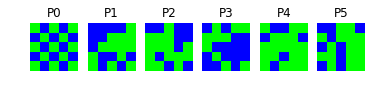

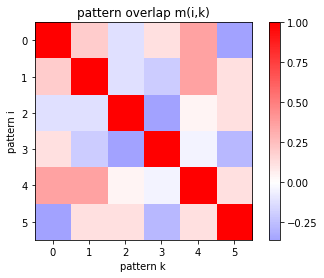

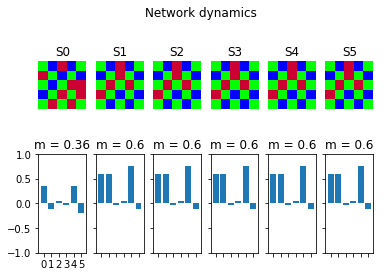

In [14]:
#Create a network with N=16 neurons.
pattern_size = 5

# create an instance of the class HopfieldNetwork / Create a single 5 by 5 checkerboard pattern.
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
checkerboard = factory.create_checkerboard()

# create a checkerboard pattern and add it to the pattern list / Store the checkerboard in the network.
pattern_list = [checkerboard]
# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=5, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)

# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=8)
hopfield_net.set_state_from_pattern(noisy_init_state)

# asynchronous dynamics
hopfield_net.set_dynamics_sign_async()

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=5)

# Plot the sequence of network states along with the overlap of network state with the checkerboard
# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

Comment on your results (max 3 lines).
#### [3 points]

From the results, we can see that the network is very often not able to match perfectly the pattern. However, at the end the network is able to come quite close to the ideal solution. 

## 8.6.2. Stochastic neuron
Implement a synchronous and stochastic neuron. Use the function HopfieldNetwork.set_dynamics_to_user_function() in order to pass _get_sigmoid_update_function(), which you should implement. 

In the stochastic network the dynamics depend on the so-called inverse temperature $\beta$. The temperature in this system can be seen as noise. The activity $S_i(t+1)$ in the next time-step follows the probability distribution: 
\begin{equation}
P\left(S_i(t+1)=1\right) = \frac1{1+\exp\left[-h_i(t)\beta\right]} \qquad \textrm{ where } \qquad h_i(t) = \sum_j w_{ij} S_j(t)
\end{equation}
That is, it is more likely for a neuron $i$ to be set to +1 if its input $h_i$ is higher.

Parameters: network size = 5x5, number of rnd patterns = 5, on probability = 0.5, number of flips = 8, $\beta$=10.

*** Hint 1: *** For inspiration check out the source code of the function _get_sign_update_function()

*** Hint 2: *** In order to implement stochasticity, we suggest to use the python-library numpy.random.

#### [7 points]

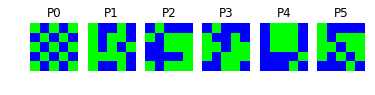

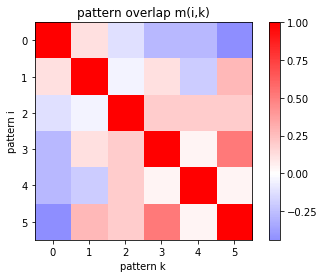

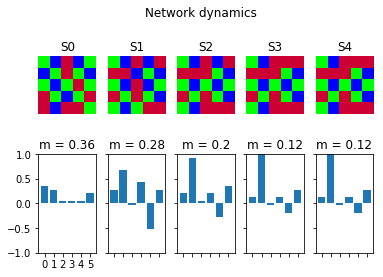

In [15]:
# Synchronous stochastic update
def _get_sigmoid_update_function(beta):
    """
    for internal use

    Returns:
        A function implementing a synchronous state update using the sigmoid function (h)
    """
    def upd(state_s0, weights):   
        h = np.sum(weights * state_s0, axis=1)
        s1 = 1/(1+np.exp(-h*(beta+np.random.randn(1))))
        # by definition, neurons have state +/-1. If the
        # sign function returns 0, we set it to +1
        idx0 = s1 == 0
        s1[idx0] = 1
        return s1
    return upd

beta = 10
hopfield_net_stoch = network.HopfieldNetwork(nr_neurons= pattern_size**2)
hopfield_net_stoch.set_dynamics_to_user_function(_get_sigmoid_update_function(beta=beta))

# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=5, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=8)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

## 8.6.3 Finite temperature
Choose one of the stored patterns (let's say number 1) and flip 10 bits. Then plot the overlap between the network state and this pattern, $m^1$, over time for different values of $\beta$, $\beta\in \left[0.1,2,5,100\right]$.

Parameters: network size = 10x10, number of rnd patterns = 5, on probability = 0.5, number of flips = 10, number of trials = 100, number of steps = 9.

*** Hint 1:***  In order to plot $m^1$ over time, run the script several times and compute the mean  and the standard deviation $\sigma$ of the overlap $m^1$ over trials. You can use the function plt.fill and its parameter $\alpha$ (the transparency), in order to fill with color the area between $+\sigma$ and $-\sigma$.

*** Hint 2: *** Use the function pattern_tools.compute_overlap()

*** Hint 3:*** We suggest to implement and test your code with a smaller network size before getting to the 10x10 units network.
#### [7 points]

In [16]:
import numpy as np 

def compute_overlap_over_time(hopfield_net, pattern_list, idx, init_state, nTrials, nr_steps):
    """ For a given hopfield_net and a pattern_list, initialize it with the init_state and run it
    Compute its overlap with the pattern pattern_list[idx] in time (for nr_steps)
    Repeat the above over many trial (nTrials)
    """
    overlap = np.zeros((nTrials,nr_steps+1))
    
    for i in range(0,nTrials):
        
        # learn patterns
        #???
        hopfield_net.store_patterns(pattern_list)
        
        # run a synch and stoch Hopfield model with the same initial state
        #???
        hopfield_net_stoch.set_dynamics_to_user_function(_get_sigmoid_update_function(beta=beta))
        
        # let the netwrok dynamics evolve
        #???
        states = hopfield_net.run_with_monitoring(nr_steps=5)
        states_as_patterns = factory.reshape_patterns(states) ##???Comment avoir accès à Factory dans la fonction on ne peut pas avoir accès àa la factory. Faut-il prendre la taille du en regardant dans le vector ?? 
        
        for i_step in range(len(states_as_patterns)):
            overlap[i,i_step] = pattern_tools.compute_overlap(init_state, pattern_list[idx])
    return overlap


# Create the patterns and store them
nTrials = 100
nr_steps= 9
betas = [0.1,2,5,100]

idx = 1
init_state = pattern_tools.flip_n(pattern_list[idx], nr_of_flips=10)

overlap_mean = np.zeros((len(betas), nr_steps+1))
overlap_std = np.zeros((len(betas), nr_steps+1))
for j in range(0, len(betas)):
    
    #DECLARE A NEW HOPFIELD NET FOR EACH BEAT 
    hopfield_net_stoch = network.HopfieldNetwork(nr_neurons= pattern_size**2)
    hopfield_net_stoch.set_dynamics_to_user_function(_get_sigmoid_update_function(beta=betas[j]))
    
    #Overlap is a 2D vector were in the 1st column is the trial number and on the second one the number of trial
    overlap = compute_overlap_over_time(hopfield_net, pattern_list, idx, init_state, nTrials, nr_steps)
    
    overlap_mean[j,:] = np.mean(overlap[:, end])
    overlap_std[j,:] = np.std(overlap[:, end]) #end because we only want to take into account the last step 
    
    # Plot
    plot = plt.plot(betas, overlap_mean)
    fill_between(betas, overlap_mean-overlap_std, overlap_mean+overlap_std)

NameError: name 'end' is not defined

Comment on your plot (max 5 lines).
#### [5 points]

write your answer here

## 8.6.4 Asynchronous stochastic neuron
Implement the stochastic neuron of exercise 8.6.2, but with asynchronous update.

*** Hint: *** For help check out the source code of the function _get_async_sign_update_function()
#### [4 points]

In [1]:
def _get_asynch_sigmoid_update_function(beta):
    """
    for internal use

    Returns:
        A function implementing a asynchronous state update using the sigmoid function
    """
    def upd(state_s0, weights):
        random_neuron_idx_list = np.random.permutation(len(state_s0))
        state_s1 = state_s0.copy()
        
        for i in range(len(random_neuron_idx_list)):
            rand_neuron_i = random_neuron_idx_list[i]
            h_i = np.dot(weights[:, rand_neuron_i], state_s1)
            s_i = 1/(1+np.exp(-h_i*(beta+np.random.randn(1))))
            if s_i == 0:
                s_i = 1
            state_s1[rand_neuron_i] = s_i
            
        return state_s1
    return upd

beta = 10
hopfield_net_asynch_stoch = network.HopfieldNetwork(nr_neurons= pattern_size**2)
hopfield_net_asynch_stoch.set_dynamics_to_user_function(_get_asynch_sigmoid_update_function(beta=beta))

NameError: name 'network' is not defined

# 8.7 Energy 

## 8.7.1 Exercise
Set up a deterministic and asynchronous Hopfield network and store 3 random patterns. 

The energy can be defined as $E=-\sum_i^N \sum_j^N w_{ij} S_i S_j$. 

Implement a function that calculates the energy according to the above definition. 

Parameters: network size = 10x10, number of rnd patterns = 3, on probability = 0.5.

#### [4 points]

In [1]:
# Set up your network
pattern_size = 10 
hopfield_net_asynch_stoch = network.HopfieldNetwork(nr_neurons= pattern_size**2)
hopfield_net_asynch_stoch.set_dynamics_to_user_function(_get_asynch_sigmoid_update_function(beta=beta))

# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = []

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net_asynch_stoch.store_patterns(pattern_list)
hopfield_net_asynch_stoch.set_state_from_pattern(pattern_list[0])

# from this initial state, let the network dynamics evolve.
states = hopfield_net_asynch_stoch.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

print(numpy.shape(states))
print(numpy.shape(hopfield_net_asynch_stoch.weights))
print(numpy.dot(hopfield_net_asynch_stoch.weights,np.transpose(states[0])))
#weight is a nrOfNeurons x nrOfNeurons matrix of weights = hopfield_network.weights
#State is a 5 x 100 matrix : 5 is the number of steps and 10 x 10 is 100
#--> as input we have the sum of a 100 x 100 matrix with a 1 x 100 vector and we sum 

def energy(weight, state):
    return -numpy.sum(numpy.dot(weight,np.transpose(state))*state)

for i in range(5):
    print(energy(hopfield_net_energy.weights,states[i],pattern_size))

NameError: name 'network' is not defined

## 8.7.2 Exercise
Compute the energy of one of the stored patterns: $E (\xi^{\mu})$.

Choose one pattern and gradually flip more and more bits. For that you need to implement a function flip_idx, after checking out the function pattern_tools.flip_n(). How does the energy change and why? (max 3 lines)

*** Hint: *** You can get an intuition by plotting the energy of the state as a function of the number of flipped bits.
#### [1 + 6 + 4 points]

-0.0


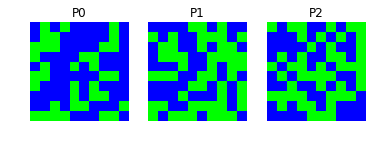

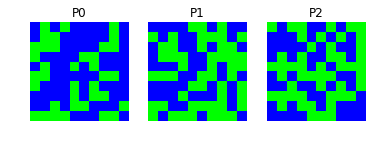

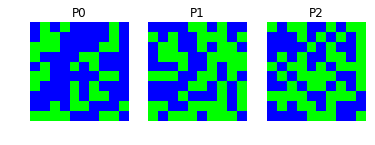

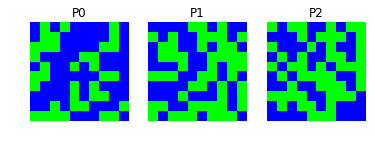

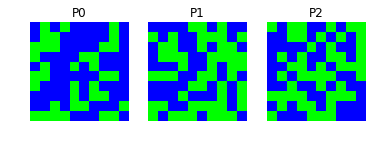

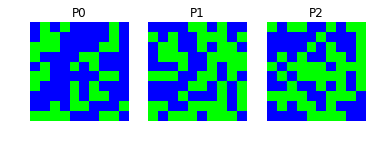

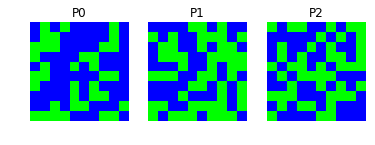

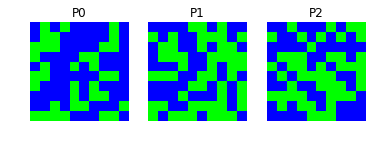

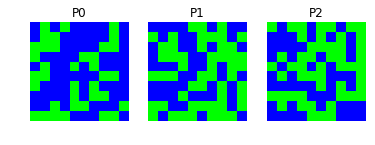

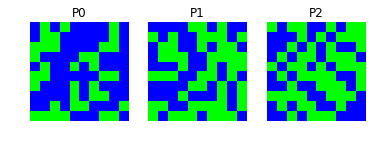

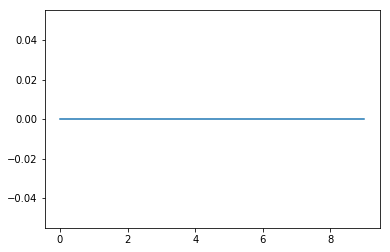

In [55]:
#computes the energy of oe of the stores patterns
print(energy(hopfield_net_asynch_stoch.weights, states[-1])) #[-1] refers to the last element

nr_flips = np.arange(0,10,1)
energy_flips = np.zeros(len(nr_flips))
pattern_to_flip = pattern_list[-1] #so that we always start flipping from the same prototype

for i in range(len(nr_flips)):
    
    pattern_list.pop()
    pattern_list.append(pattern_tools.flip_n(pattern_to_flip, nr_of_flips=i))
    plot_tools.plot_pattern_list(pattern_list)

    hopfield_net_asynch_stoch.store_patterns(pattern_list)
    hopfield_net_asynch_stoch.set_state_from_pattern(pattern_list[0])
    energy_flips[i] = energy(hopfield_net_asynch_stoch.weights, states[-1])
    
# Plot
plt.plot(nr_flips, energy_flips)

your answer

## 8.7.3 Question.
Compute the energy of the reverse of one of the stored patterns $E(-\xi^1)$. What do you observe, what are the consequences on the dynamics of the system and why? (max 3 lines) 
#### [1 + 3 points]

## 8.7.4 Exercise.
1 - Initialize the network with the state $S_0 = sgn(\sum_{\mu}^3 \xi^{\mu})$ and run the dynamics. What is the energy of this state?

Parameters: number steps = 4.

#### [2 points]

In [ ]:
#reminder xhi = {0,1} and not {-1, 1} so we need to find a way to go from Wij to Xhi
h = sum(JE SAIS PAS )
hopfield_net_asynch_stoch.state = np.sign(h)

2 - Consider the ensemble of all states that differ from $S_0$ in exactly one flip. Initialize the network in each of those states and check what is the final state of the dynamical evolution.

*** Hint: *** Compare the final states with $S_0$.
#### [8 points]

In [ ]:
# Function to flip one neuron
def flip_idx(template, idx):
    """
    makes a copy of the template pattern and flips the idx-th state.
    Args:
        template:
        nr_of_flips:
    Returns:
        a new pattern
    """
    ???
    return ???


# Flip all neurons one after the other
for i in range(0, pattern_size**2):
    
    s_0_flipped = flip_idx(s_0, i)
    
    ???

3 - What can you tell about the stability of $S_0$? Briefly comment (max 5 lines). 

***Hint:*** For help, refer to the pdf on associative memory on the MOODLE (https://moodle.epfl.ch/pluginfile.php/1091071/mod_resource/content/0/Lecture5/Hertz_Hopfield.pdf).

#### [6 points]

your answer

## 8.7.5 Question.
Does your argumentation above hold in the case of $S_0 = sgn(\sum_{\mu}^2 \xi^{\mu})$? Why? (max 3 lines)
#### [3 points]

## 8.7.6 Exercise.
Use now the stochastic neuron with asynchronous update you implemented in 8.6.4. Initialize the network with the state $S_0 = sgn(\sum_{\mu}^3 \xi^{\mu})$. For $\beta$ varying in $\beta\in \left[1,2,8,10,100\right]$, plot the overlap of the network initialized with $S_0$ with each of the 3 stored patterns as a function of time. 

What do you observe? Comment on the stability of the spurious state $S_0$ in each case. (max 4 lines)

Parameters: network size = 10x10, number of rnd patterns = 3, on probability = 0.5, number of steps = 9.

*** Hint 1: *** Make 4 plots (or 1 plot with 4 subplots), one for each value of $\beta$.

*** Hint 2: *** You can use the function pattern_tools.compute_overlap_list (or pattern_tools.compute_overlap).
#### [5 + 4 points]

In [ ]:
???

for j in range(0, len(betas)):
    
    
    ???
    
    
    # Compute
    
    
    # Plot

your answer